<a href="https://colab.research.google.com/github/PDCaire10/USIL_Capstone_202202_G10_PNN_Bagging/blob/main/Modelo_PNN%2BBagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configuracion y librerias**

---



In [289]:
! git clone https://github.com/PDCaire10/USIL_Capstone_202202_G10_PNN_Bagging.git

fatal: destination path 'USIL_Capstone_202202_G10_PNN_Bagging' already exists and is not an empty directory.


In [338]:
!pip install imblearn

!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [385]:
import pandas as pd

#Libreriras para graficos
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms #Librería muy útil para ver los valores nulos
import numpy as np

import statistics

#dividir la data
from sklearn.model_selection import train_test_split

#estandarizacion
from sklearn.preprocessing import StandardScaler


#balanaceo de datos
from imblearn.over_sampling import SMOTE

#regresion logistica
from sklearn.linear_model import LogisticRegression


#metricas
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score



import warnings
warnings.filterwarnings('ignore')


In [340]:
datos = pd.read_csv("/content/USIL_Capstone_202202_G10_PNN_Bagging/cs-data.csv")

**Ver descripción y estadísticas descriptivas**

---



In [341]:
#primeras 5 filas del dataset
datos.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [342]:
col_names = datos.columns

col_names

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [343]:
datos.shape

(150000, 12)

In [344]:
datos.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [345]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

**Exploración de los datos**

---



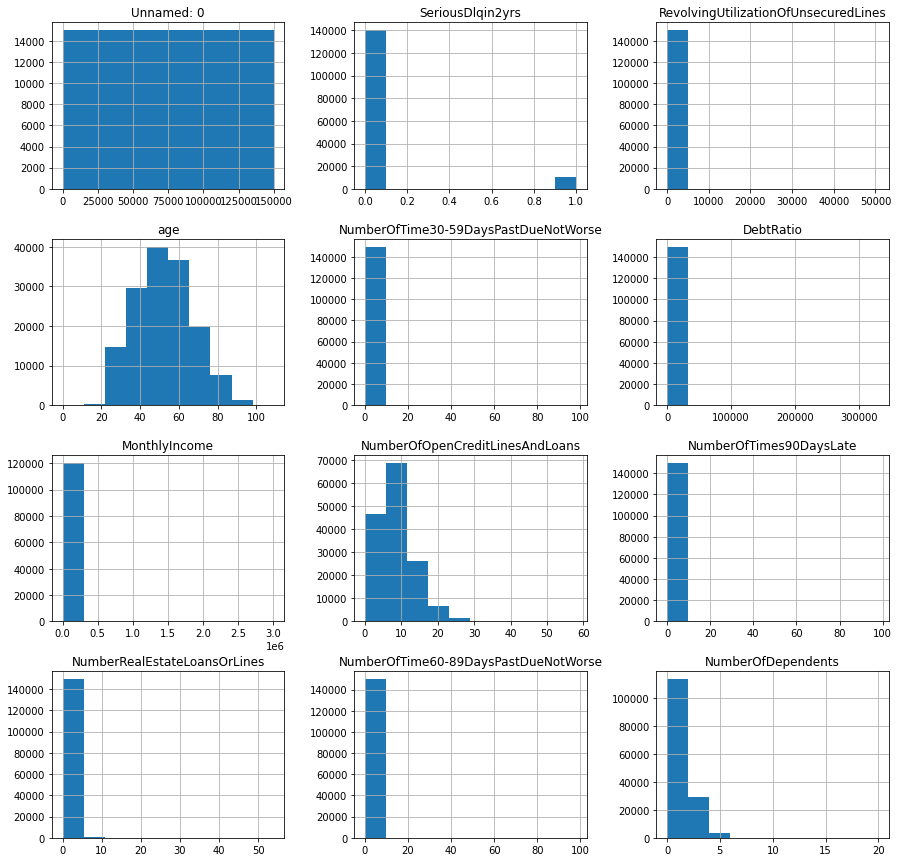

In [346]:
datos.hist(figsize=[15,15]);

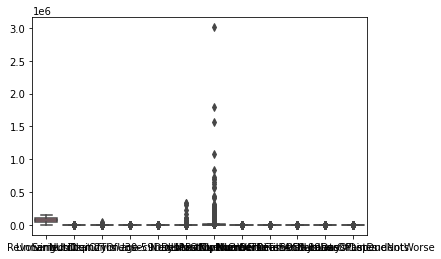

In [347]:
sns.boxplot(data=datos);

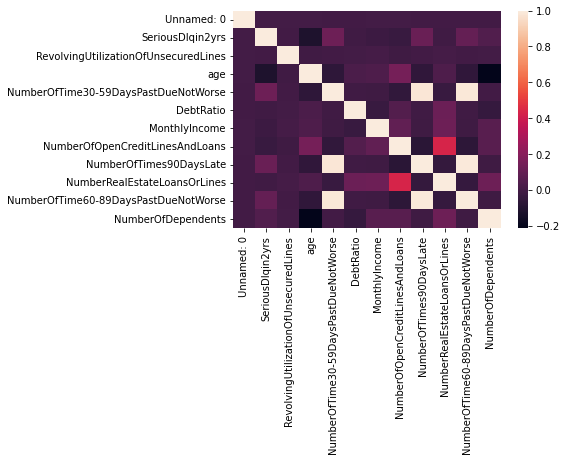

In [348]:
sns.heatmap(datos.corr()); #annot=True

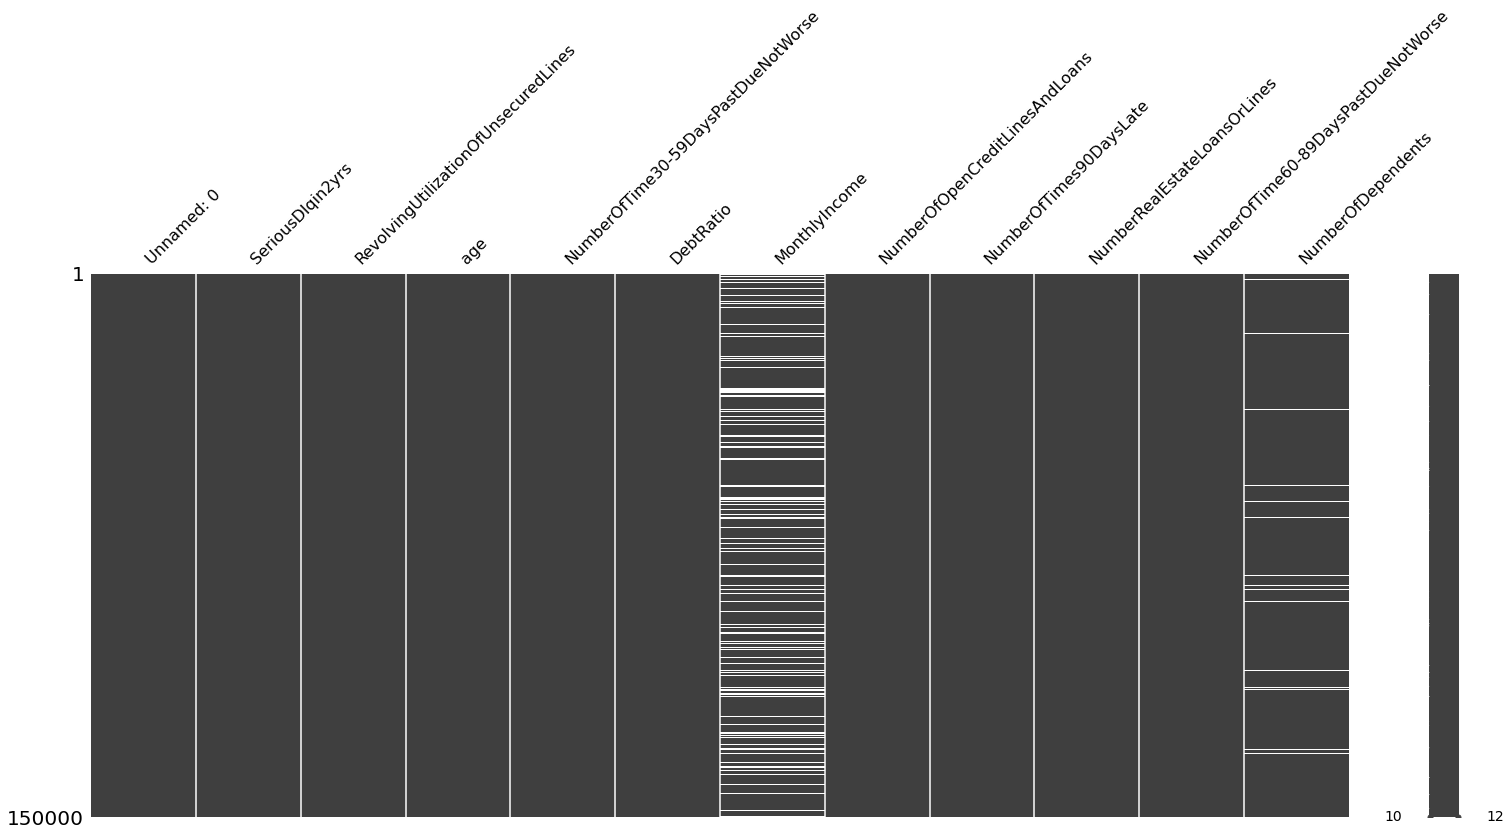

In [349]:
ms.matrix(datos)

**Limpieza de datos**

---



In [350]:
#datos=datos.drop(["Unnamed: 0"], axis=1)
datos.drop("Unnamed: 0", axis=1, inplace=True)

In [351]:
datos.isnull().values.any()

True

In [352]:
datos.isnull().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [353]:
# check for missing values in variables
datos.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [354]:
#Manejo de los valores atipicos
datos.loc[datos['age'] == 0, 'age'] = datos['age'].median()
datos.loc[datos['NumberOfTime30-59DaysPastDueNotWorse']>20,'NumberOfTime30-59DaysPastDueNotWorse']=datos['NumberOfTime30-59DaysPastDueNotWorse'].median()
datos.loc[datos['NumberOfTime60-89DaysPastDueNotWorse']>20,'NumberOfTime60-89DaysPastDueNotWorse']=datos['NumberOfTime60-89DaysPastDueNotWorse'].median()
datos.loc[datos['NumberOfTimes90DaysLate']>20,'NumberOfTimes90DaysLate']=datos['NumberOfTimes90DaysLate'].median()
datos.loc[datos['NumberRealEstateLoansOrLines']>50,'NumberRealEstateLoansOrLines']=datos['NumberRealEstateLoansOrLines'].median()

In [355]:
datos['MonthlyIncome'].fillna(datos['MonthlyIncome'].median(),inplace = True)
datos['NumberOfDependents'].fillna(datos['NumberOfDependents'].mode()[0],inplace = True)

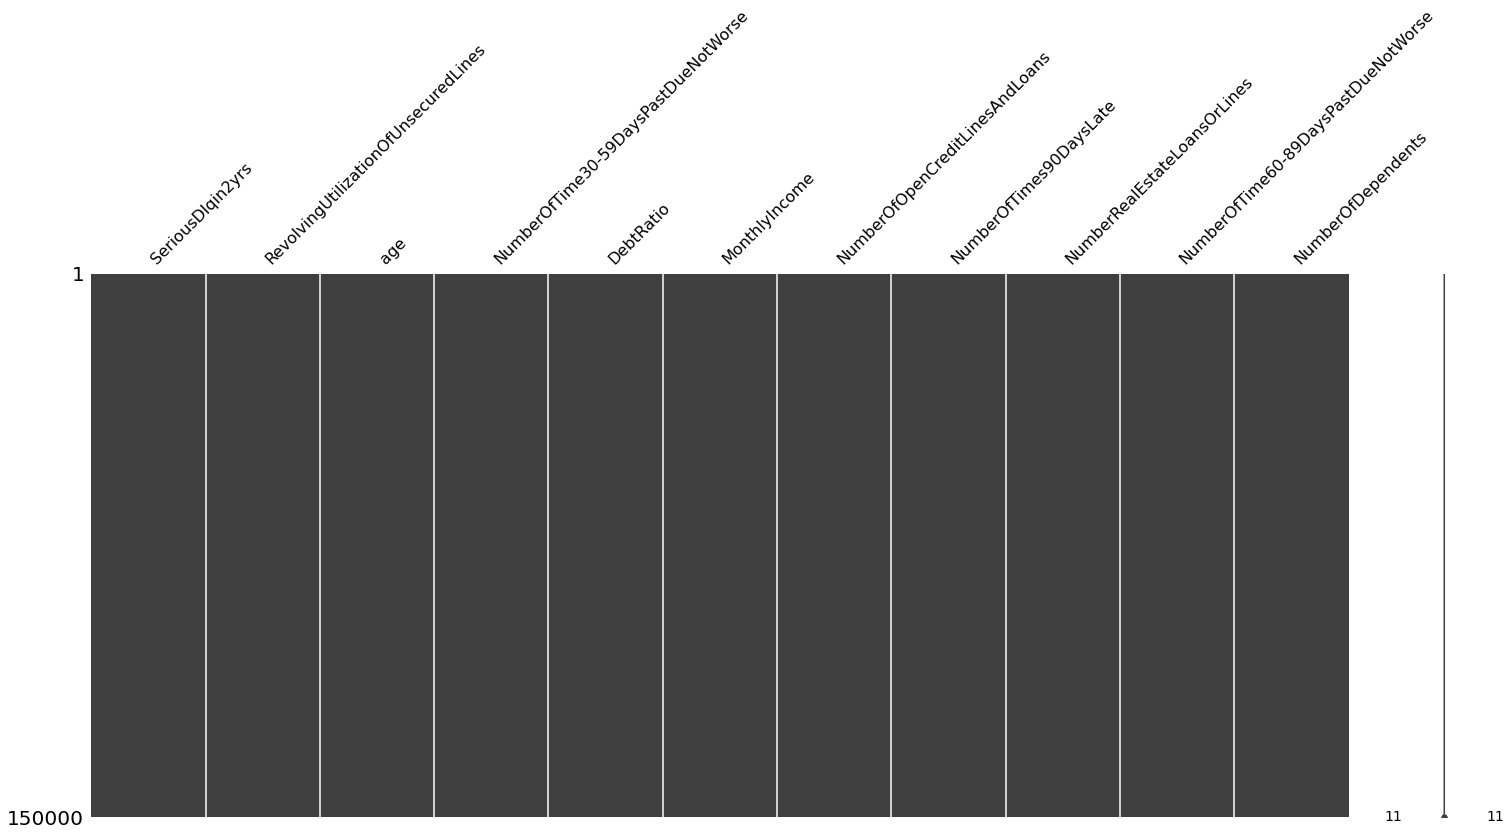

In [356]:
ms.matrix(datos)

**Establecer el vector de caracteristicas y la variable objetivo**

---



In [357]:
X = datos.drop('SeriousDlqin2yrs',axis = 1)
y = datos["SeriousDlqin2yrs"]

In [358]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [359]:
y

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

**Balanceo de datos**

---



In [360]:
datos.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [361]:
datos.SeriousDlqin2yrs.value_counts()/datos.shape[0]

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

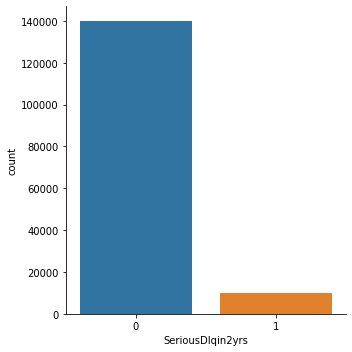

In [362]:
sns.factorplot("SeriousDlqin2yrs",data=datos,kind="count")

In [363]:
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm=smote.fit_resample(X, y)

In [364]:
datos_X_sm=pd.DataFrame(data=X_sm,columns=X.columns)
datos_y_sm=pd.DataFrame(data=y_sm,columns=["SeriousDlqin2yrs"])

In [365]:
#concatenar la informacion
datos_balanceados_sm=pd.concat([datos_X_sm, datos_y_sm], axis=1)

In [366]:
#Visualizar registros duplicados
datos_balanceados_sm[datos_balanceados_sm.duplicated(keep=False)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
52,1.0,62,0,0.0,5400.0,1,0,0,0,0.0,0
238,1.0,28,0,0.0,5400.0,0,0,0,0,0.0,0
331,1.0,29,0,0.0,5400.0,0,0,0,0,0.0,0
530,0.0,82,0,0.0,5400.0,3,0,0,0,0.0,0
1126,1.0,70,0,0.0,5400.0,1,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
279707,1.0,57,0,0.0,5400.0,0,0,0,0,0.0,1
279714,1.0,33,0,60.0,5400.0,0,1,0,0,0.0,1
279840,1.0,26,0,0.0,5400.0,0,0,0,0,0.0,1
279880,1.0,29,0,0.0,5400.0,1,0,0,0,0.0,1


In [367]:
#Eliminar registros duplicados
datos_balanceados_sm.drop_duplicates(inplace=True)

In [368]:
#Visualizar el balanceo despues de aplicar la tecnica SMOTE
datos_balanceados_sm.SeriousDlqin2yrs.value_counts()

0    139209
1    138652
Name: SeriousDlqin2yrs, dtype: int64

In [369]:
datos_balanceados_sm.SeriousDlqin2yrs.value_counts()/datos_balanceados_sm.shape[0]

0    0.501002
1    0.498998
Name: SeriousDlqin2yrs, dtype: float64

In [370]:
datos_balanceados_sm.shape

(277861, 11)

In [371]:
X = datos_balanceados_sm.drop('SeriousDlqin2yrs',axis = 1)
y = datos_balanceados_sm["SeriousDlqin2yrs"]

In [372]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.000000
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.000000
2,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.000000
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.000000
4,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
279942,0.663931,55,1,0.447174,3943.670490,7,0,1,0,3.323775
279943,0.788015,60,0,0.609962,4573.450340,10,0,1,0,0.135102
279945,1.000000,32,1,0.478326,2738.597902,2,1,1,0,2.000000
279946,0.745603,62,0,0.815956,1300.000000,5,1,0,0,0.000000


In [373]:
y

0         1
1         0
2         0
3         0
4         0
         ..
279942    1
279943    1
279945    1
279946    1
279947    1
Name: SeriousDlqin2yrs, Length: 277861, dtype: int64

**Feature Scaling**

---



In [374]:
#Estandarizar los datos
escalar = StandardScaler()
X= escalar.fit_transform(X)

**Método de evaluación tradicional - Separar el conjunto de datos de entrenamiento y prueba**

---



In [375]:
#Separo los datos de "train" en entrenamiento y "prueba" 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Regresion logistica**

In [389]:
import statistics
mi_lista = []
for i in range(1,11):
  mi_lista.append(i)
  #print('numero x',i)

print(mi_lista)
print(statistics.mean(mi_lista))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
5


In [395]:
valores_accuracy_logis = []
valores_f1_logis = []
for i in range(1,11):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  regLog = LogisticRegression(max_iter=500,class_weight='balanced',solver='liblinear')
  regLog.fit(X_train, y_train)
  y_pred_log = regLog.predict(X_test)
  #print('Iteracion ', i, '- Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))
  valores_accuracy_logis.append(round(accuracy_score(y_test, y_pred_log),4))
  valores_f1_logis.append(round(f1_score(y_test, y_pred_log),4))


print("10 iteraciones, valores de Accuracy: ", valores_accuracy_logis)
print('Promedio de Accuracy: {0:0.4f}',format(statistics.mean(valores_accuracy_logis)))

print("10 iteraciones, valores de F1-score: ", valores_f1_logis)
print('Promedio de F1-score: {0:0.4f}',format(statistics.mean(valores_f1_logis)))

10 iteraciones, valores de Accuracy:  [0.6975, 0.6946, 0.6992, 0.6948, 0.6966, 0.6973, 0.6957, 0.6955, 0.6933, 0.6971]
Promedio de Accuracy: {0:0.4f} 0.69616
10 iteraciones, valores de F1-score:  [0.6824, 0.6772, 0.683, 0.6767, 0.6813, 0.6799, 0.679, 0.6782, 0.6777, 0.6785]
Promedio de F1-score: {0:0.4f} 0.67939


In [376]:
regLog = LogisticRegression(max_iter=500,class_weight='balanced',solver='liblinear')
#Entreno el modelo
regLog.fit(X_train, y_train)
#Realizo una predicción
y_pred_log = regLog.predict(X_test)

In [377]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))

Logistic Regression accuracy score with all the features: 0.6931


In [378]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred_log)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6930985256540986


In [379]:
#Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(y_test, y_pred_log)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.6754703099034643


In [380]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71     41868
           1       0.71      0.64      0.68     41491

    accuracy                           0.69     83359
   macro avg       0.69      0.69      0.69     83359
weighted avg       0.69      0.69      0.69     83359



In [381]:
roc_auc = roc_auc_score(y_test, y_pred_log)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.6928670328274253
